<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_5_1_df_analise_PM_MZM_CV_AV_N_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tamanho de amostras do df 165374
Minimo CV = 3.18016853
Maximo CV = 99.22059198
Posição do minimo OFC 163483
Posição do maximo OFC 22050
Limites Apm =  2.1  a  3.5
Limites Aa =  2.1  a  12.5
Limites Ab =  2.1  a  12.5


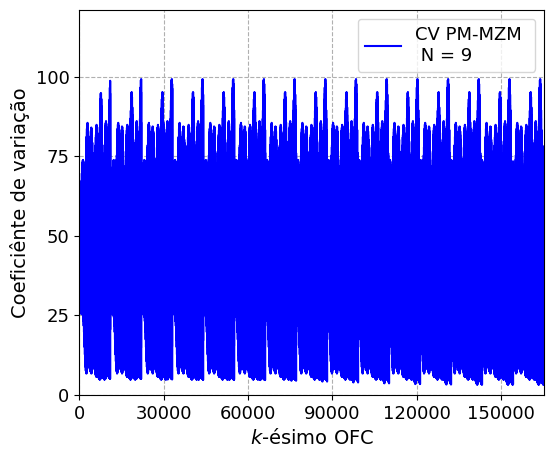

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator, AutoLocator, ScalarFormatter

url = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_3_3_2_all_values_PM_MZM_N_9.csv'

dfN9 = pd.read_csv(url)
print('tamanho de amostras do df', len(dfN9))

# tamanho das figuras
h_let = 14
vd =  6
hd =  5

# Dando nomenas colunas
dfN9.shape
'''
203,2.1,2.2,11.8,47.84296735,6.97,0,0,0,0,0
204,2.1,2.2,11.9,48.32423515,6.65,0,0,0,0,0
205,2.1,2.2,12.0,48.81525928,6.35,0,0,0,0,0
206,2.1,2.2,12.1,49.27026745,6.06,0,0,0,0,0
1925,2.1 , 3.9, 5.5,    14.96157009,  1.73,  0,0,  2.1,3.9000000000000017,5.5000000000000036
2030,2.1 , 4.0,5.5,     14.94486381,   1.72,   0,0,  2.1,4.000000000000002,5.5000000000000036
2031,2.1 , 4.0,5.6,     12.63230386,   1.49,   0,0,  2.1,4.000000000000002,5.600000000000003
2032,2.1 , 4.0,5.7,     14.19860075,   1.94,   0,0,  2.1,4.000000000000002,5.700000000000003

             5284  ,2.1, 7.1,  5.4, 40, 1.36, 1, 0,2.1,7.100000000000005,5.400000000000003
'''
#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN9.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']

# print(df.head(10))  #printa 10 linas do df


minimo = dfN9['E'].min()
ind_min = dfN9['E'].idxmin()
maximo = dfN9['E'].max()
ind_mx = dfN9['E'].idxmax()

print('Minimo CV =', minimo)
print('Maximo CV =', maximo)
print('Posição do minimo OFC',ind_min+2)
# print(dfN9.iloc[ind_min])
print('Posição do maximo OFC',ind_mx+2)  #soma mais dois pq os nomes das colunas e o 0 não é contablizado
#print(dfN9.iloc[ind_mx])


# ver limites das variaveis
miApm = dfN9['B'].min()
mxApm = dfN9['B'].max()
print('Limites Apm = ',miApm,' a ', mxApm)
miAa = dfN9['C'].min()
mxAa = dfN9['C'].max()
print('Limites Aa = ',miAa,' a ', mxAa)
miAb = dfN9['D'].min()
mxAb = dfN9['D'].max()
print('Limites Ab = ',miAb,' a ', mxAb)


#print('maximos de columnas C',maxim)
#maxim1 = dfN9['D'].min()
#print('maximos de columnas D',maxim1)


###############################################################################
#Condição para encontraros OFCs com CV menor que CV1 *pode mudar
###############################################################################
top_sd2 = 5   # varlo top para o qual os SDs minimos serão separados
cond2 = dfN9['E'] <= top_sd2
OFCs_planos2 = dfN9[cond2]
#print(OFCs_planos1)
# salvando os OFCs planos em um novo dataframe
df2 = OFCs_planos2
###############################################################################
#Condição para encontraros OFCs com CV menor que CV2 *pode mudar
top_sd3 = 10 #10   # varlo top para o qual os SDs minimos serão separados  # 18 equivale mas o menos a 2 dB
cond3 = dfN9['E'] <= top_sd3
OFCs_planos3 = dfN9[cond3]
#print(OFCs_planos2)
# salvando os OFCs planos em um novo dataframe
df3 = OFCs_planos3


#  ----------------------LIMITES ------------------------------
#bot_Aa0 = -5000;  top_Aa0 =  240000;
#bot_Ab0 = -0.005;  top_Ab0 =  0.1;
#limite_x = (bot_Aa0, top_Aa0)  # Limite do eixo x de 2 a 4
#limite_y = (bot_Ab0, top_Ab0)  # Limite do eixo y de 3 a 6
'''
# ploting
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(vd,hd))
plt.plot(dfN9['E'],'b-', label='SD PM-MZM \n N = 9')
plt.grid(True, linestyle='--')

#ax.set_ylim(noise_ref, lim_sup)
#ax.set_xlim(-lim_lat-0.5, lim_lat + 0.5)
#ax.set_yticks(range(noise_ref+1, lim_sup+1, 10))

plt.xlabel('k-ésimo OFC')
plt.ylabel('Desvio padrão')

#plt.xlim(limite_x)
#plt.ylim(limite_y)
#plt.title('Gráfico das Colunas')
# Adicionar legenda
plt.legend()
plt.show()
'''

#------------ PLOTING---------------------
fig, ax = plt.subplots(figsize=(vd,hd))
fnt_lab = 14
fnt_tik_leg = 13
# Plotando os dados
ax.plot(dfN9['E'],'b-', label='CV PM-MZM \n N = 9')
# Configurando os limites dos eixos
ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(0, 121) # Limites para o eixo y

# Adicionando títulos e rótulos
#ax.set_title("Gráfico de X ao Quadrado")
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("Coeficiênte de variação", fontsize=fnt_lab)
# Ajustando os tamanhos de fonte dos rótulos dos ticks
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
'''
# Ajustando o espaçamento dos ticks no eixo X e Y
ax.xaxis.set_major_locator(AutoLocator())  # Ticks a cada 1 unidade no eixo X
ax.yaxis.set_major_locator(AutoLocator()) # Ticks a cada 20 unidades no eixo Y
'''
# Configurando MaxNLocator para espaçamentos maiores nos ticks do eixo X e Y
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo Y

# Configurando o formato científico para o eixo X
#ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Exibindo a legenda
ax.legend(loc='upper right', fontsize=fnt_tik_leg)
ax.grid(True, linestyle='--')
# Mostrando o gráfico
plt.show()


In [ ]:
bot_Apm1 = 2.1;    top_Apm1  =  3.6;    ax_Apm1 = np.arange(bot_Apm1, top_Apm1, 0.1)    # top value of Apm
bot_Amz1a = 2.1;  top_Amz1a =  12.6;   ax_A1a = np.arange(bot_Amz1a, top_Amz1a, 0.1)  # top value of Amza
print('ax_Apm =', len(ax_Apm1))
print('axApm',ax_Apm1)
print('--> 0', ax_Apm1[0])
print('--> 3', ax_Apm1[9])
print('--> 15', ax_Apm1[14])
print('Len ax_Aa1 =', len(ax_A1a))
#print('axAa1 :',ax_A1a)


# Encontrando o primeiro valor maior que zero na coluna 'G'
mask = dfN9['I'] > 0
if mask.any():  # Verifica se há algum valor maior que zero
    first_positive_index = dfN9.loc[mask, 'I'].idxmax()
    first_positive_value = dfN9.loc[first_positive_index, 'I']
    print("Índice do primeiro valor maior ou igual que 2:", first_positive_index)
    print("Valor:", first_positive_value)
else:
    print("Não há valores maiores que zero na coluna 'F'.")

print(dfN9.iloc[first_positive_index])

ax_Apm = 15
axApm [2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5]
--> 0 2.1
--> 3 3.000000000000001
--> 15 3.5000000000000013
Len ax_Aa1 = 105
Índice do primeiro valor maior ou igual que 2: 154789
Valor: 3.5000000000000013
A    154791.00000
B         3.50000
C         2.50000
D         4.10000
E        14.96157
F         1.73000
G         0.00000
H         0.00000
I         3.50000
J         2.50000
K         4.10000
Name: 154789, dtype: float64


In [ ]:
# localizar um ponto baseado nos valores dos outros
valor1 = 12
valor2 = 12
valor_pm = 2.9

fila = dfN9.loc[(dfN9['B'] == valor_pm) & (dfN9['C'] == valor1) & (dfN9['D'] == valor2)]

print(fila)

           A    B     C     D         E     F  G  H    I    J    K
98693  98695  2.9  12.0  12.0  90.23502  30.2  0  0  0.0  0.0  0.0


# Fig. 3.17 (a)

Num. elementos de DF2: 410
Valor minimo: 3.18016853
Limite superior CV : 5


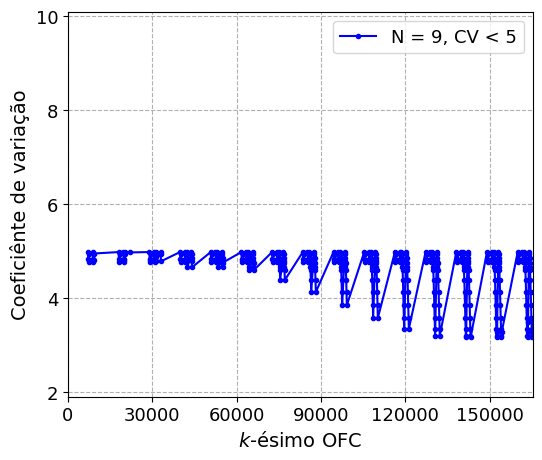

In [ ]:
# print(df2) Plota valores menores de CV a CV2
print('Num. elementos de DF2:', len(df2['E']))
valor_min = df2['E'].min()
print('Valor minimo:', valor_min)
print('Limite superior CV :', top_sd2)
#------------ PLOTING---------------------
fig, ax = plt.subplots(figsize=(vd,hd))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(df2['E'],'b.-', label='N = 9, CV < 5')
# Configurando os limites dos eixos
ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(1.9, 10.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("Coeficiênte de variação", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='upper right', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

# Fig. 3.17 (b)

Num. elementos de DF2: 4862
Valor minimo : 3.18016853
Limite superior CV : 10


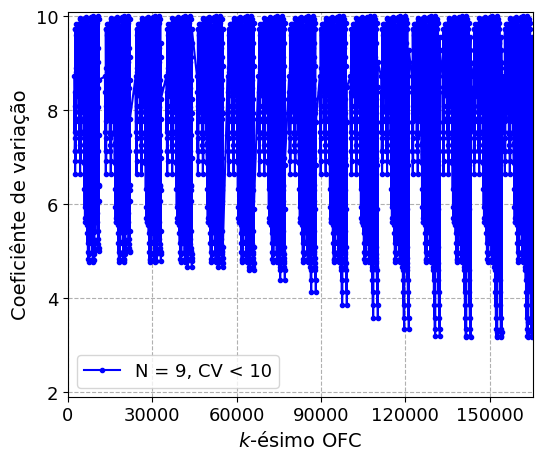

In [ ]:
# print(df3) Plota valores menores de CV a CV3
print('Num. elementos de DF2:', len(df3['E']))
valor_min = df3['E'].min()
print('Valor minimo :', valor_min)
print('Limite superior CV :', top_sd3)
#------------ PLOTING---------------------
fig, ax = plt.subplots(figsize=(vd,hd))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(df3['E'],'b.-', label='N = 9, CV < 10')
# Configurando os limites dos eixos
ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(1.9, 10.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("Coeficiênte de variação", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='lower left', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

# Fig. 3.18 (a)

Quantidade de elementos de DF2: 410
Valor minimo total: 3.18016853
Limite superior CV : 5


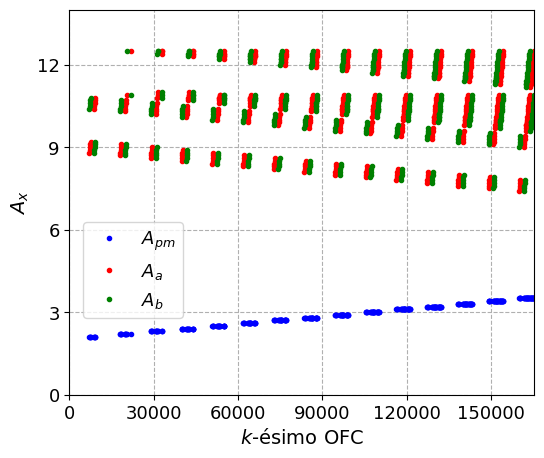

In [ ]:
# print(df2) Plota valores menores de CV a CV2
print('Quantidade de elementos de DF2:', len(df2['E']))
valor_min = df2['E'].min()
print('Valor minimo total:', valor_min)
print('Limite superior CV :', top_sd2)
#------------ PLOTING---------------------
fig, ax = plt.subplots(figsize=(vd,hd))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados

# Variacao de Apm, Aa e Ab respeito do k-ésimo OFC
ax.plot(df2['B'],'b.', label='$A_{pm}$')
ax.plot(df2['C'],'r.', label='$A_a$')
ax.plot(df2['D'],'g.', label='$A_b$')

#ax.plot(df2['E'],'b-', label='N = 9, CV < 10')
# Configurando os limites dos eixos
ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(0, 14) # Limites para o eixo y ----
#----------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel('$A_x$', fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc=(0.03,.2), fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico


# Fig. 3.18 (b)

Quantidade de elementos de DF2: 4862
Valor minimo total: 3.18016853
Limite superior CV : 5


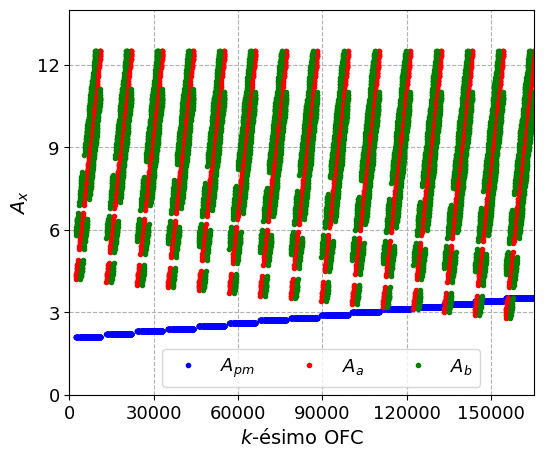

In [ ]:
# print(df2) Plota valores menores de CV a CV2
print('Quantidade de elementos de DF2:', len(df3['E']))
valor_min = df3['E'].min()
print('Valor minimo total:', valor_min)
print('Limite superior CV :', top_sd2)
#------------ PLOTING---------------------
fig, ax = plt.subplots(figsize=(vd,hd))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados

# Variacao de Apm, Aa e Ab respeito do k-ésimo OFC
ax.plot(df3['B'],'b.', label='$A_{pm}$')
ax.plot(df3['C'],'r.', label='$A_a$')
ax.plot(df3['D'],'g.', label='$A_b$')

#ax.plot(df2['E'],'b-', label='N = 9, CV < 10')
# Configurando os limites dos eixos
ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(0, 14) # Limites para o eixo y ----
#----------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel('$A_x$', fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(ncol=3, loc=(0.2, 0.02), fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

# Fig. 3.19 (a)

Quantidade de dados = 32


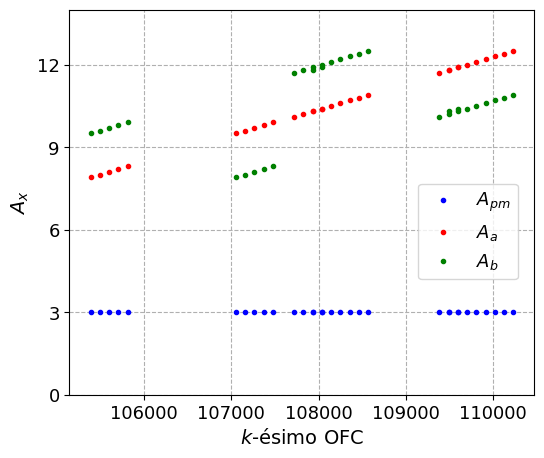

In [ ]:
# Fazendo o texte para um valor fixo de Apm
val_esp_Apm2 = 3
cond2 =  df2['B'] == val_esp_Apm2
df_temp2   =  df2[cond2]
# print(df_temp2.head(15))
n_de_linhas2 = df_temp2.shape[0]
print('Quantidade de dados =', n_de_linhas2)
#print(df_temp2)
#------------ PLOTING---------------------
fig, ax = plt.subplots(figsize=(vd,hd))
fnt_lab = 14 ; fnt_tik_leg = 13

# Variacao de Apm, Aa e Ab respeito do k-ésimo OFC
ax.plot(df_temp2['B'],'b.', label='$A_{pm}$')
ax.plot(df_temp2['C'],'r.', label='$A_a$')
ax.plot(df_temp2['D'],'g.', label='$A_b$')

# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(0, 14) # Limites para o eixo y ----
#----------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel('$A_x$', fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc=(0.75, 0.3), fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

# Fig. 3.19 (b)

Quantidade de dados = 334


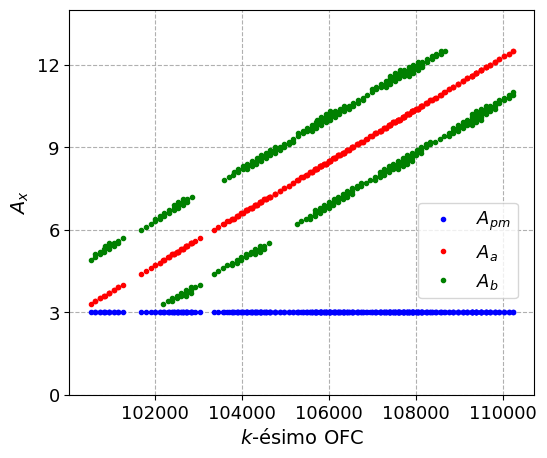

In [ ]:
# Fazendo o texte para um valor fixo de Apm
val_esp_Apm3 = 3
cond3 =  df3['B'] == val_esp_Apm3
df_temp3   =  df3[cond3]
# print(df_temp2.head(15))
n_de_linhas3 = df_temp3.shape[0]
print('Quantidade de dados =', n_de_linhas3)


#------------ PLOTING---------------------
fig, ax = plt.subplots(figsize=(vd,hd))
fnt_lab = 14 ; fnt_tik_leg = 13

# Variacao de Apm, Aa e Ab respeito do k-ésimo OFC
ax.plot(df_temp3['B'],'b.', label='$A_{pm}$')
ax.plot(df_temp3['C'],'r.', label='$A_a$')
ax.plot(df_temp3['D'],'g.', label='$A_b$')

# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
ax.set_ylim(0, 14) # Limites para o eixo y ----
#----------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel('$A_x$', fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc=(0.75, 0.25), fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

# Fig. 3.20 (a)

In [ ]:
# Extrair daddos de Aa e Ab ou seja C e D
#  para df2
x = df2['C'].to_numpy()  # extraindo dados da coluna Aa
y = df2['D'].to_numpy()  # extraindo dados da coluna Ab

X  =  np.column_stack((x, y))

def diagonal_line(x):
    return x

# Determine a região acima ou abaixo da linha diagonal e armazene os dados em vetores separados
above_line = []
below_line = []

for i in range(len(X)):
    if X[i, 1] > diagonal_line(X[i, 0]):
        above_line.append(X[i])
    else:
        below_line.append(X[i])
# Converta os vetores em arrays numpy
above_line = np.array(above_line)
below_line = np.array(below_line)

# extração de X1 e X2
x1 = above_line[:, 0]
y1 = above_line[:, 1]
x2 = below_line[:, 0]
y2 = below_line[:, 1]


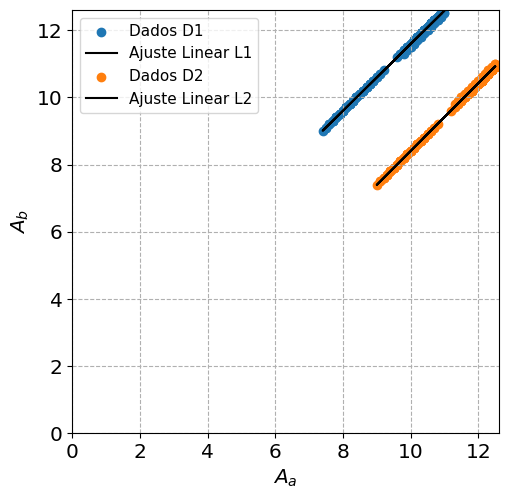

Parâmetro a1: 0.99
Parâmetro b1: 1.66
(Aa; Ab) = ( 10 ; 11.585 )
diferença dos Ax relativos Aa - Ab= pi/2 1.59
Parâmetro a1: 1.01
Parâmetro b1: -1.66
(Aa; Ab) = ( 10 ; 8.404 )
diferença dos Ax relativos Aa - Ab= pi/2: -1.6


In [ ]:
Ax_ref =  10
Vpi = 2.4
# tamanho figura
vd = 5.5
hd = 5.5
h_let = 14.5

def linear_function(x, a, b):
    return a * x + b

# Limites de plot
bot_Aa = 0;  top_Aa =  12.6;
bot_Ab = 0;  top_Ab =  12.6;
limite_x = (bot_Aa, top_Aa)  # Limite do eixo x de 2 a 4
limite_y = (bot_Ab, top_Ab)  # Limite do eixo y de 3 a 6
'''
# PLOTA OS DADOS SEPARADOS  X1,X2, Y1 E Y2 SEM A CURVA DE AJUSTE
plt.plot(x1, y1, '.', x2, y2, '.')
# Aplique os limites aos eixos x e y
plt.xlim(limite_x)
plt.ylim(limite_y)
plt.grid(True, linestyle='--')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')
plt.legend()
plt.show()
'''

#------- PLOTING   ----------
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(vd,hd))

#-----------------############# x1 y y1
# Realize o fitting usando curve_fit - LINHA ACIMA
params, covariance = curve_fit(linear_function, x1, y1)
a1, b1 = params  # Os parâmetros ótimos são armazenados em 'params'

plt.scatter(x1, y1, label='Dados D1')
plt.plot(x1, linear_function(x1, a1, b1), 'k', label='Ajuste Linear L1')

#-----------------############# x2 y y2
# Realize o fitting usando curve_fit- LINHA ACIMA
params, covariance = curve_fit(linear_function, x2, y2)
a2, b2 = params # Os parâmetros ótimos são armazenados em 'params'
# plot os dados e a curva ajustada
plt.scatter(x2, y2, label='Dados D2')
plt.plot(x2, linear_function(x2, a2, b2), 'k', label='Ajuste Linear L2')
# Aplique os limites aos eixos x e y
plt.xlim(limite_x)
plt.ylim(limite_y)
plt.grid(True, linestyle='--')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')
plt.legend(fontsize = 11)
plt.show()

# Imprima os parâmetros a e b  CURVA 1
print('Parâmetro a1:', round(a1, 2))
print('Parâmetro b1:', round(b1, 2))
Axb1 = a1*Ax_ref+b1
op1 = Axb1 - Ax_ref
print('(Aa; Ab) = (', Ax_ref,';', round(Axb1, 3) ,')')
print('diferença dos Ax relativos Aa - Ab= pi/2', round(op1, 2))

# Imprima os parâmetros a e b CURVA 2
print('Parâmetro a1:', round(a2, 2))
print('Parâmetro b1:', round(b2, 2))
Axb2 = a2*Ax_ref+b2
op2 = Axb2 - Ax_ref
print('(Aa; Ab) = (', Ax_ref,';', round(Axb2, 3) ,')')
print('diferença dos Ax relativos Aa - Ab= pi/2:', round(op2, 2))

#*******************************************


# Fig. 3.20 (b)

In [ ]:
# Extrair daddos de Aa e Ab ou seja C e D
#  para df3
x = df3['C'].to_numpy()  # extraindo dados da coluna Aa
y = df3['D'].to_numpy()  # extraindo dados da coluna Ab

X  =  np.column_stack((x, y))

def diagonal_line(x):
    return x

# Determine a região acima ou abaixo da linha diagonal e armazene os dados em vetores separados
above_line = []
below_line = []

for i in range(len(X)):
    if X[i, 1] > diagonal_line(X[i, 0]):
        above_line.append(X[i])
    else:
        below_line.append(X[i])
# Converta os vetores em arrays numpy
above_line = np.array(above_line)
below_line = np.array(below_line)

# extração de X1 e X2
x1 = above_line[:, 0]
y1 = above_line[:, 1]
x2 = below_line[:, 0]
y2 = below_line[:, 1]


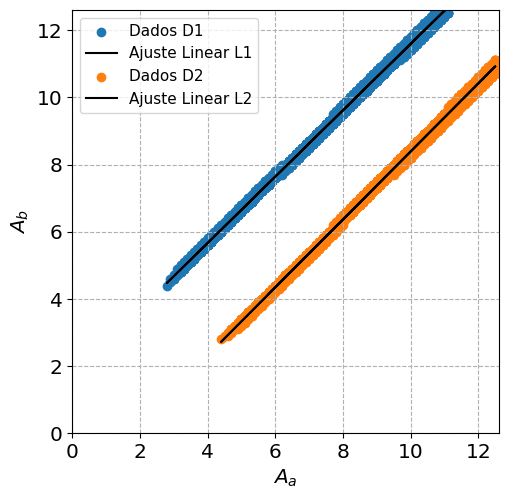

Parâmetro a1: 0.99
Parâmetro b1: 1.72
(Aa; Ab) = ( 10 ; 11.59 )
diferença dos Ax relativos Aa - Ab= pi/2 1.59
Parâmetro a1: 1.01
Parâmetro b1: -1.72
(Aa; Ab) = ( 10 ; 8.389 )
diferença dos Ax relativos Aa - Ab= pi/2: -1.61


In [ ]:

Ax_ref =  10
Vpi = 2.4
# tamanho figura
vd = 5.5
hd = 5.5
h_let = 14.5

def linear_function(x, a, b):
    return a * x + b

# Limites de plot
bot_Aa = 0;  top_Aa =  12.6;
bot_Ab = 0;  top_Ab =  12.6;
limite_x = (bot_Aa, top_Aa)  # Limite do eixo x de 2 a 4
limite_y = (bot_Ab, top_Ab)  # Limite do eixo y de 3 a 6
'''
# PLOTA OS DADOS SEPARADOS  X1,X2, Y1 E Y2 SEM A CURVA DE AJUSTE
plt.plot(x1, y1, '.', x2, y2, '.')
# Aplique os limites aos eixos x e y
plt.xlim(limite_x)
plt.ylim(limite_y)
plt.grid(True, linestyle='--')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')
plt.legend()
plt.show()
'''

#------- PLOTING   ----------
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(vd,hd))

#-----------------############# x1 y y1
# Realize o fitting usando curve_fit - LINHA ACIMA
params, covariance = curve_fit(linear_function, x1, y1)
a1, b1 = params  # Os parâmetros ótimos são armazenados em 'params'

plt.scatter(x1, y1,  label='Dados D1')
plt.plot(x1, linear_function(x1, a1, b1), 'k', label='Ajuste Linear L1')

#-----------------############# x2 y y2
# Realize o fitting usando curve_fit- LINHA ACIMA
params, covariance = curve_fit(linear_function, x2, y2)
a2, b2 = params # Os parâmetros ótimos são armazenados em 'params'
# plot os dados e a curva ajustada
plt.scatter(x2, y2, label='Dados D2')
plt.plot(x2, linear_function(x2, a2, b2), 'k', label='Ajuste Linear L2')
# Aplique os limites aos eixos x e y
plt.xlim(limite_x)
plt.ylim(limite_y)
plt.grid(True, linestyle='--')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')
plt.legend(fontsize=11)
plt.show()

# Imprima os parâmetros a e b  CURVA 1
print('Parâmetro a1:', round(a1, 2))
print('Parâmetro b1:', round(b1, 2))
Axb1 = a1*Ax_ref+b1
op1 = Axb1 - Ax_ref
print('(Aa; Ab) = (', Ax_ref,';', round(Axb1, 3) ,')')
print('diferença dos Ax relativos Aa - Ab= pi/2', round(op1, 2))

# Imprima os parâmetros a e b CURVA 2
print('Parâmetro a1:', round(a2, 2))
print('Parâmetro b1:', round(b2, 2))
Axb2 = a2*Ax_ref+b2
op2 = Axb2 - Ax_ref
print('(Aa; Ab) = (', Ax_ref,';', round(Axb2, 3) ,')')
print('diferença dos Ax relativos Aa - Ab= pi/2:', round(op2, 2))

#*******************************************


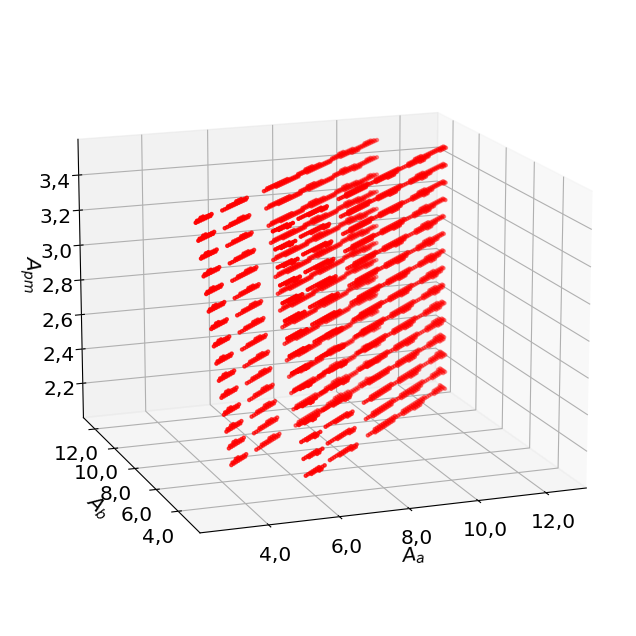

In [ ]:
from matplotlib.ticker import FuncFormatter
# Função para formatar os rótulos dos eixos com vírgula como separador decimal
def format_comma(x, pos):
    return f'{x:.1f}'.replace('.', ',')


# Relação entre tres variáveis

# Criando uma figura para o plot 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Extraindo os dados de cada DataFrame
x = df3['C']
y = df3['D']
z = df3['B']

# Plotando os dados
ax.scatter(y, x, z, c='r', marker='.')  # Usando pontos vermelhos
# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().zaxis.set_major_formatter(formatter)
# Configurando rótulos dos eixos
ax.set_xlabel('$A_a$')
ax.set_ylabel('$A_b$')
ax.set_zlabel('$A_{pm}$')

# Primeira visão
ax.view_init(elev=15, azim=250)
plt.show()



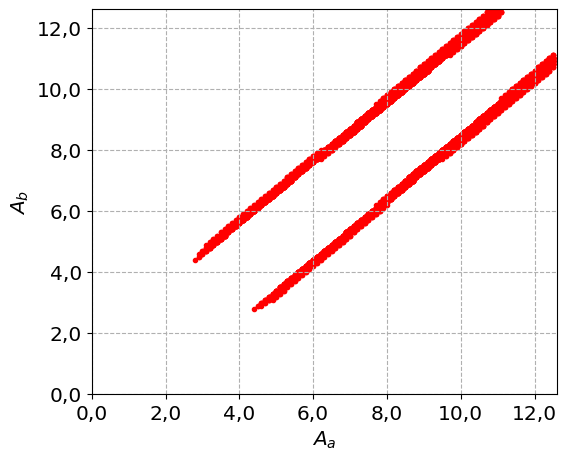

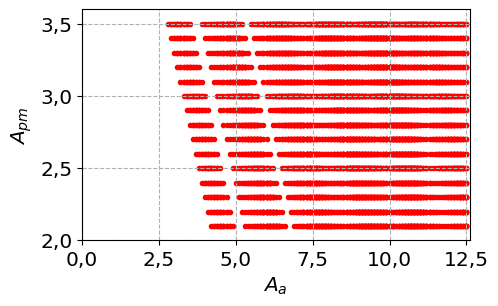

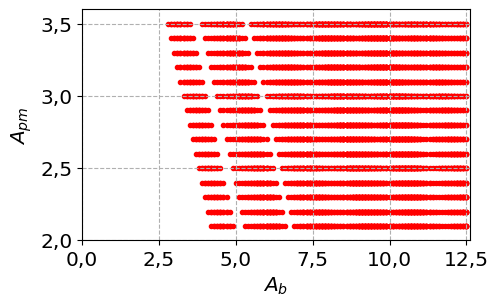

In [ ]:
# Configurar o tamanho da figura (largura, altura) em polegadas
plt.figure(figsize=(6, 5))
plt.scatter(y,x, color='r', marker='.')
# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlim(limite_x)
plt.ylim(limite_y)
plt.grid(True, linestyle='--')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')
#plt.legend(fontsize=11)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(x,z, color='r', marker='.')
# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlim(limite_x)
plt.ylim(2, 3.6)
plt.grid(True, linestyle='--')
plt.xlabel('$A_a$')
plt.ylabel('$A_{pm}$')
#plt.legend(fontsize=11)
plt.show()

plt.figure(figsize=(5, 3))
plt.scatter(y,z, color='r', marker='.')
# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlim(limite_x)
plt.ylim(2, 3.6)
plt.grid(True, linestyle='--')
plt.xlabel('$A_b$')
plt.ylabel('$A_{pm}$')
#plt.legend(fontsize=11)
plt.show()



In [ ]:
# ENCONTRAR EQUIVALENCIA CV A AV
df = dfN9

# Variável M com valores de 1 a 20 em incrementos de 0.5
M = np.arange(3, 17, 0.1)

# Listas para armazenar os resultados
m_values = []
e_values = []
f_values = []

# Iterar sobre os valores de M
for m_value in M:
    # Filtrar o DataFrame para obter linhas onde E é menor que o valor atual de M
    filtered_df = df[df['E'] <= m_value]

    if not filtered_df.empty:
        # Encontrar o máximo valor de F no DataFrame filtrado
        max_f_value = filtered_df['F'].max()

        # Encontrar o valor correspondente de E para o máximo valor de F
        corresponding_e_value = filtered_df.loc[filtered_df['F'] == max_f_value, 'E'].values[0]

        # Adicionar os valores às listas
        m_values.append(m_value)
        e_values.append(round(corresponding_e_value,2))
        f_values.append(max_f_value)
    else:
        # Caso o DataFrame filtrado esteja vazio
        m_values.append(m_value)
        e_values.append(None)
        f_values.append(None)

# Criar um novo DataFrame com os resultados
results_df = pd.DataFrame({
    'M': m_values,
    'E': e_values,
    'F': f_values
})

# Exibir a tabela
print(results_df)

        M      E     F
0     3.0    NaN   NaN
1     3.1    NaN   NaN
2     3.2   3.18  0.38
3     3.3   3.29  0.39
4     3.4   3.29  0.39
..    ...    ...   ...
135  16.5  16.39  2.32
136  16.6  16.39  2.32
137  16.7  16.39  2.32
138  16.8  16.39  2.32
139  16.9  16.39  2.32

[140 rows x 3 columns]


In [ ]:
# Remover as linhas repetidas, mantendo apenas a última ocorrência
df_unique = results_df.drop_duplicates(subset=['E', 'F'], keep='last')

print(df_unique)
# Salvar o DataFrame em um arquivo Excel
df_unique.to_excel('output.xlsx', index=False)

        M      E     F
1     3.1    NaN   NaN
2     3.2   3.18  0.38
5     3.5   3.29  0.39
8     3.8   3.57  0.41
11    4.1   3.85  0.47
13    4.3   4.13  0.51
15    4.5   4.39  0.53
17    4.7   4.60  0.54
18    4.8   4.76  0.55
19    4.9   4.81  0.57
21    5.1   4.95  0.61
24    5.4   5.17  0.63
26    5.6   5.44  0.64
28    5.8   5.68  0.70
30    6.0   5.82  0.76
31    6.1   6.00  0.79
32    6.2   6.15  0.81
33    6.3   6.25  0.81
38    6.8   6.39  0.86
41    7.1   6.84  0.88
44    7.4   7.12  0.93
45    7.5   7.49  0.93
48    7.8   7.50  0.98
50    8.0   7.80  1.00
51    8.1   8.08  1.02
55    8.5   8.18  1.08
58    8.8   8.54  1.11
60    9.0   8.85  1.14
67    9.7   9.02  1.23
69    9.9   9.73  1.27
71   10.1   9.94  1.35
78   10.8  10.13  1.36
82   11.2  10.82  1.44
85   11.5  11.23  1.46
87   11.7  11.55  1.50
89   11.9  11.71  1.51
91   12.1  11.91  1.61
93   12.3  12.13  1.66
101  13.1  12.34  1.69
104  13.4  13.19  1.76
106  13.6  13.40  1.76
110  14.0  13.68  1.79
111  14.1  

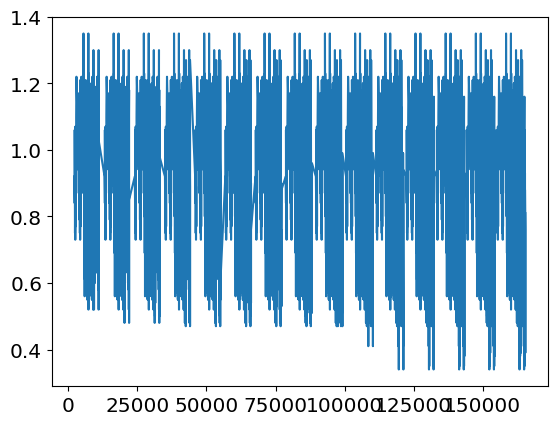

In [ ]:
AV = df3['F']

plt.plot(AV)
plt.show()

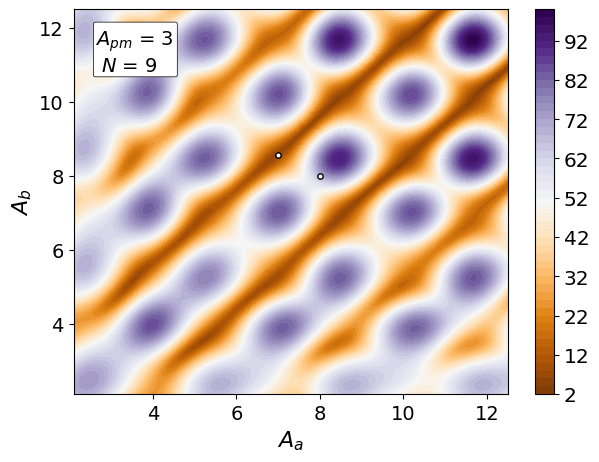

In [ ]:
Apm_tag  = 3

# Configurações de estilo
tk_sz = 14  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação


# Filtrar dados para o valor atual de Apm
subset = dfN9[dfN9['B'] == Apm_tag]

# Cria uma grade regular de pontos
x_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
y_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
x_grid, y_grid = np.meshgrid(x_unique, y_unique)

# Interpola os valores de 'z' para a grade criada
z_grid = griddata((subset['C'], subset['D']), subset['E'], (x_grid, y_grid), method='cubic')

#----------- PLOT ------------
# Cria o gráfico de contorno
plt.figure(figsize=(7, 5))
contour = plt.contourf(x_grid, y_grid, z_grid, levels=50, cmap='PuOr') #'viridis')
plt.colorbar(contour)

# Definindo a localização dos ticks manualmente
#plt.xticks(np.linspace(2, 12, 5))  # 5 ticks no eixo X, distribuídos uniformemente
#plt.yticks(np.linspace(2, 12, 5))  # 5 ticks no eixo Y, distribuídos uniformemente

plt.xticks(fontsize=tk_sz)
plt.yticks(fontsize=tk_sz)

#plt.title(f'Mapa de Calor para Apm = {Apm_tag}')
plt.xlabel('$A_a$', fontsize=ax_lb_sz)
plt.ylabel('$A_b$', fontsize=ax_lb_sz)


# Ponto a ser marcado no plano P1
Aa1 = 7
Ab1 = 7+np.pi/2
# Ponto a ser marcado no plano P2
Aa2 = 8
Ab2 = 8

 # Marcar o ponto (4,5)
plt.scatter(Aa1, Ab1, color='white', s=15, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=15, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Adicionando uma anotação com o valor de Apm e N = 9
plt.annotate(f'$A_{{pm}}$ = {Apm_tag} \n $N$ = 9', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))

plt.show()

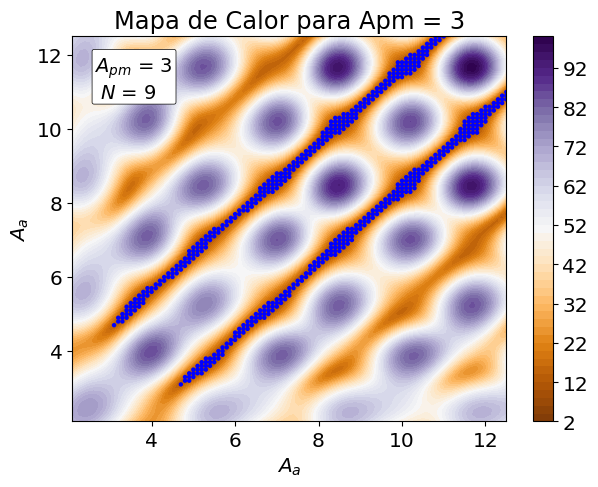

In [ ]:
# Valores específicos
Apm_value = 3
CV = 13  # Substitua 'valor_especifico_CV' limite superior FR
# Filtrar dados para o valor específico de Apm
subset = dfN9[dfN9['B'] == Apm_value]

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.figure(figsize=(7, 5))
contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap='PuOr')#cmap='viridis')
plt.colorbar(contour)
plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_a$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color='blue', s=10, edgecolors='none', label=f'E < {CV}')  # Sem bordas nos marcadores

plt.annotate(f'$A_{{pm}}$ = {Apm_value} \n $N$ = 9', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))
# Adicionando legenda
#plt.legend()

plt.show()
